# Dice score비교

In [1]:
import os
os.getcwd()

'C:\\Users\\jungr\\Dropbox\\Prostate'

In [2]:
os.chdir(r"C:\Users\jungr\Dropbox\Kidney_data_compare_dataset")

## 순서대로, Baseline모델 train했을때 Dice score, test했을때 Dice score, 우리 모델 train했을때 Dice score, test했을때 Dice score 경로를 넣어주시면 됩니다.

In [3]:

import matplotlib.pyplot as plt
import numpy as np
###############################################################
###############    Dice Score Val Tumor Only    ###############
###############################################################
dice_tumor_only_train = []

num_points = 4

filename = 'baseline_dicescore_train.txt'
f = open(filename, 'r')

for line in f.readlines():
    dice_tumor_only_train.append(float(line))
    
a = 0
b = []
for i in range(len(dice_tumor_only_train)):
    a += dice_tumor_only_train[i]
    if ((i+1) % num_points) == 0:
        b.append(a/num_points)
        a = 0
dice_tumor_only_train = b
###############################################################
###############    Dice Score Train Tumor Only    #############
###############################################################
dice_tumor_only_val = []

filename = 'baseline_dicescore_val.txt'
f = open(filename, 'r')

for line in f.readlines():
    dice_tumor_only_val.append(float(line))
    
a = 0
b = []
for i in range(len(dice_tumor_only_val)):
    a += dice_tumor_only_val[i]
    if ((i+1) % num_points) == 0:
        b.append(a/num_points)
        a = 0
dice_tumor_only_val = b
    
###############################################################
###############  Dice Score Train Tumor & organ ###############
###############################################################
dice_train = []

filename = 'OrgUNETR_dice_score_train.txt'
f = open(filename, 'r')

for line in f.readlines():
    dice_train.append(float(line))
    
a = 0
b = []
for i in range(len(dice_train)):
    a += dice_train[i]
    if ((i+1) % num_points) == 0:
        b.append(a/num_points)
        a = 0
dice_train = b
    
###############################################################
###############  Dice Score Val Tumor & organ #################
###############################################################
dice_val = []

filename = 'OrgUNETR_dice_score_val.txt'
f = open(filename, 'r')

for line in f.readlines():
    dice_val.append(float(line))
    
a = 0
b = []
for i in range(len(dice_val)):
    a += dice_val[i]
    if ((i+1) % num_points) == 0:
        b.append(a/num_points)
        a = 0
dice_val = b
    
    
    
    
    
    
    
    


In [4]:
import math
tumor = np.array(dice_tumor_only_val)
both = np.array(dice_val)

(np.max(both)-np.max(tumor))/np.max(both)

0.49049812064513265

In [5]:
np.max(both)

0.2592645

In [6]:
np.max(tumor)

0.13209575

In [7]:
len(dice_train)

50

In [8]:
len(dice_tumor_only_train)

50

In [9]:
len(dice_tumor_only_val)

50

In [10]:
len(dice_val)

50

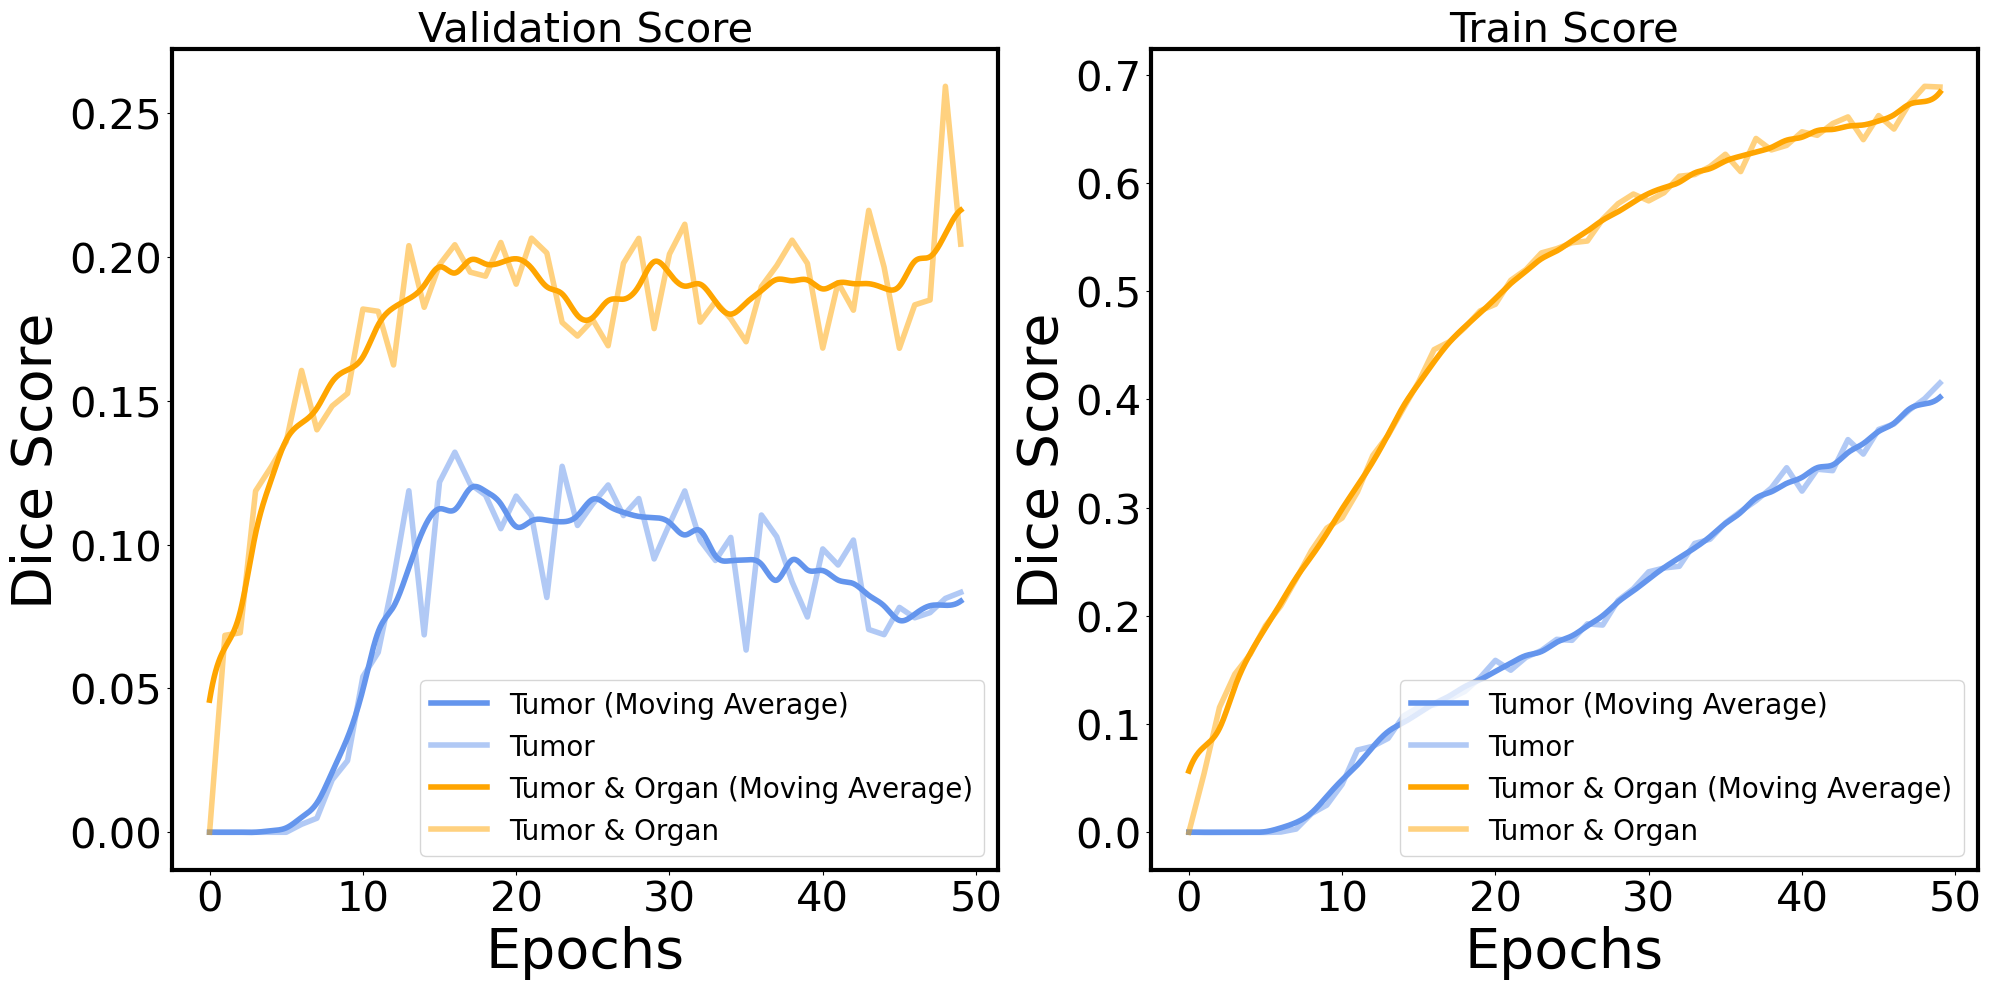

In [9]:
linewidth = 3
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.interpolate import splrep, splev

# Assuming you have numpy arrays dice_train, dice_tumor_only_val, and dice_val

x_tick = np.arange(0, len(dice_train))
window_size = 5 # You can adjust this value to change the smoothness of the curve

# Calculate the moving averages for dice_tumor_only_val and dice_val
moving_avg_tumor_only_val = pd.Series(dice_tumor_only_val).rolling(window=window_size, min_periods=1, center=True).mean()
moving_avg_val = pd.Series(dice_val).rolling(window=window_size, min_periods=1, center=True).mean()
moving_avg_tumor_only_train = pd.Series(dice_tumor_only_train).rolling(window=window_size, min_periods=1, center=True).mean()
moving_avg_train = pd.Series(dice_train).rolling(window=window_size, min_periods=1, center=True).mean()

# Create a smooth curve using cubic spline interpolation for dice_tumor_only_val
tck_tumor_only_val = splrep(x_tick, moving_avg_tumor_only_val, s=0)
tck_tumor_only_train = splrep(x_tick, moving_avg_tumor_only_train, s=0)
# Create a smooth curve using cubic spline interpolation for dice_val
tck_val = splrep(x_tick, moving_avg_val, s=0)
tck_train = splrep(x_tick, moving_avg_train, s=0)
# Generate points on the curve for plotting
x_smooth = np.linspace(x_tick.min(), x_tick.max(), 1000)
smooth_curve_tumor_only_val = splev(x_smooth, tck_tumor_only_val)
smooth_curve_val = splev(x_smooth, tck_val)
smooth_curve_tumor_only_train = splev(x_smooth, tck_tumor_only_train)
smooth_curve_train = splev(x_smooth, tck_train)
# Plot the curved lines with moving averages
plt.figure(figsize=(20, 10), dpi=100)

# Set line thickness
line_thickness = 4

# Left subplot for dice_tumor_only_val
plt.subplot(1, 2, 1)
plt.plot(x_smooth, smooth_curve_tumor_only_val, "cornflowerblue", label="Tumor (Moving Average)", linewidth=line_thickness)
plt.plot(x_tick, dice_tumor_only_val, "cornflowerblue", alpha=0.5, label="Tumor", linewidth=line_thickness)
plt.plot(x_smooth, smooth_curve_val, "orange", label="Tumor & Organ (Moving Average)", linewidth=line_thickness)
plt.plot(x_tick, dice_val, "orange", alpha=0.5, label="Tumor & Organ", linewidth=line_thickness)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.xlabel("Epochs", fontsize=40)
plt.ylabel("Dice Score", fontsize=40)
plt.title("Validation Score", fontsize=30)
plt.legend(loc="lower right", fontsize=20, frameon=True)
plt.tight_layout()
ax = plt.gca()  
ax.spines['top'].set_linewidth(linewidth)    
ax.spines['right'].set_linewidth(linewidth)  
ax.spines['bottom'].set_linewidth(linewidth) 
ax.spines['left'].set_linewidth(linewidth) 
# Right subplot for dice_tumor_only_train
plt.subplot(1, 2, 2)
plt.plot(x_smooth, smooth_curve_tumor_only_train, "cornflowerblue", label="Tumor (Moving Average)", linewidth=line_thickness)
plt.plot(x_tick, dice_tumor_only_train, "cornflowerblue", alpha=0.5, label="Tumor ", linewidth=line_thickness)
plt.plot(x_smooth, smooth_curve_train, "orange", label="Tumor & Organ (Moving Average)", linewidth=line_thickness)
plt.plot(x_tick, dice_train, "orange", alpha=0.5, label="Tumor & Organ", linewidth=line_thickness)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.xlabel("Epochs", fontsize=40)
plt.ylabel("Dice Score", fontsize=40)
plt.title("Train Score", fontsize=30)

# Adjust subplot spacing and show the legend
plt.legend(loc="lower right", fontsize=20, frameon=True)
plt.tight_layout()
ax = plt.gca()  
ax.spines['top'].set_linewidth(linewidth)    
ax.spines['right'].set_linewidth(linewidth)  
ax.spines['bottom'].set_linewidth(linewidth) 
ax.spines['left'].set_linewidth(linewidth) 


# Save the figure
plt.savefig('Picture_Dice')

# Show the plots
plt.show()


In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.interpolate import splrep, splev

# Assuming you have numpy arrays dice_train, dice_tumor_only_val, and dice_val

x_tick = np.arange(0, len(dice_train))
window_size = 5 # You can adjust this value to change the smoothness of the curve

# Calculate the moving averages for dice_tumor_only_val and dice_val
moving_avg_tumor_only_val = pd.Series(dice_tumor_only_val).rolling(window=window_size, min_periods=1, center=True).mean()
moving_avg_val = pd.Series(dice_val).rolling(window=window_size, min_periods=1, center=True).mean()
moving_avg_tumor_only_train = pd.Series(dice_tumor_only_train).rolling(window=window_size, min_periods=1, center=True).mean()
moving_avg_train = pd.Series(dice_train).rolling(window=window_size, min_periods=1, center=True).mean()

# Create a smooth curve using cubic spline interpolation for dice_tumor_only_val
tck_tumor_only_val = splrep(x_tick, moving_avg_tumor_only_val, s=0)
tck_tumor_only_train = splrep(x_tick, moving_avg_tumor_only_train, s=0)
# Create a smooth curve using cubic spline interpolation for dice_val
tck_val = splrep(x_tick, moving_avg_val, s=0)
tck_train = splrep(x_tick, moving_avg_train, s=0)
# Generate points on the curve for plotting
x_smooth = np.linspace(x_tick.min(), x_tick.max(), 1000)
smooth_curve_tumor_only_val = splev(x_smooth, tck_tumor_only_val)
smooth_curve_val = splev(x_smooth, tck_val)
smooth_curve_tumor_only_train = splev(x_smooth, tck_tumor_only_train)
smooth_curve_train = splev(x_smooth, tck_train)
# Plot the curved lines with moving averages
plt.figure(figsize=(20, 10), dpi=1000)

# Set line thickness
line_thickness = 4

# Left subplot for validation scores
plt.subplot(1, 2, 1)
plt.plot(x_smooth, smooth_curve_tumor_only_val, "orange", label="UNETR (Moving Average)", linewidth=line_thickness)
plt.plot(x_tick, dice_tumor_only_val, "orange", alpha=0.5, label="UNETR", linewidth=line_thickness)
plt.plot(x_smooth, smooth_curve_val, "cornflowerblue", label="OrgUNETR (Moving Average)", linewidth=line_thickness)
plt.plot(x_tick, dice_val, "cornflowerblue", alpha=0.5, label="OrgUNETR", linewidth=line_thickness)
plt.text(0.5, -0.25, '(a)', size=50, ha='center', va='center', transform=plt.gca().transAxes, fontname='Times New Roman')
plt.title("Validation Score", fontsize=50)
plt.xlabel("Epochs", fontsize=40)
plt.ylabel("Dice Score", fontsize=40)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.legend(loc="lower right", fontsize=22, frameon=True)

# Right subplot for training scores
plt.subplot(1, 2, 2)
plt.plot(x_smooth, smooth_curve_tumor_only_train, "orange", label="UNETR (Moving Average)", linewidth=line_thickness)
plt.plot(x_tick, dice_tumor_only_train, "orange", alpha=0.5, label="UNETR ", linewidth=line_thickness)
plt.plot(x_smooth, smooth_curve_train, "cornflowerblue", label="OrgUNETR(Moving Average)", linewidth=line_thickness)
plt.plot(x_tick, dice_train, "cornflowerblue", alpha=0.5, label="OrgUNETR", linewidth=line_thickness)
plt.text(0.5, -0.25, '(b)', size=50, ha='center', va='center', transform=plt.gca().transAxes, fontname='Times New Roman')
plt.title("Train Score", fontsize=50)
plt.xlabel("Epochs", fontsize=40)
plt.ylabel("Dice Score", fontsize=40)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.legend(loc="lower right", fontsize=22, frameon=True)

plt.tight_layout()
plt.savefig('Kidney_Dice_2cols')
plt.show()


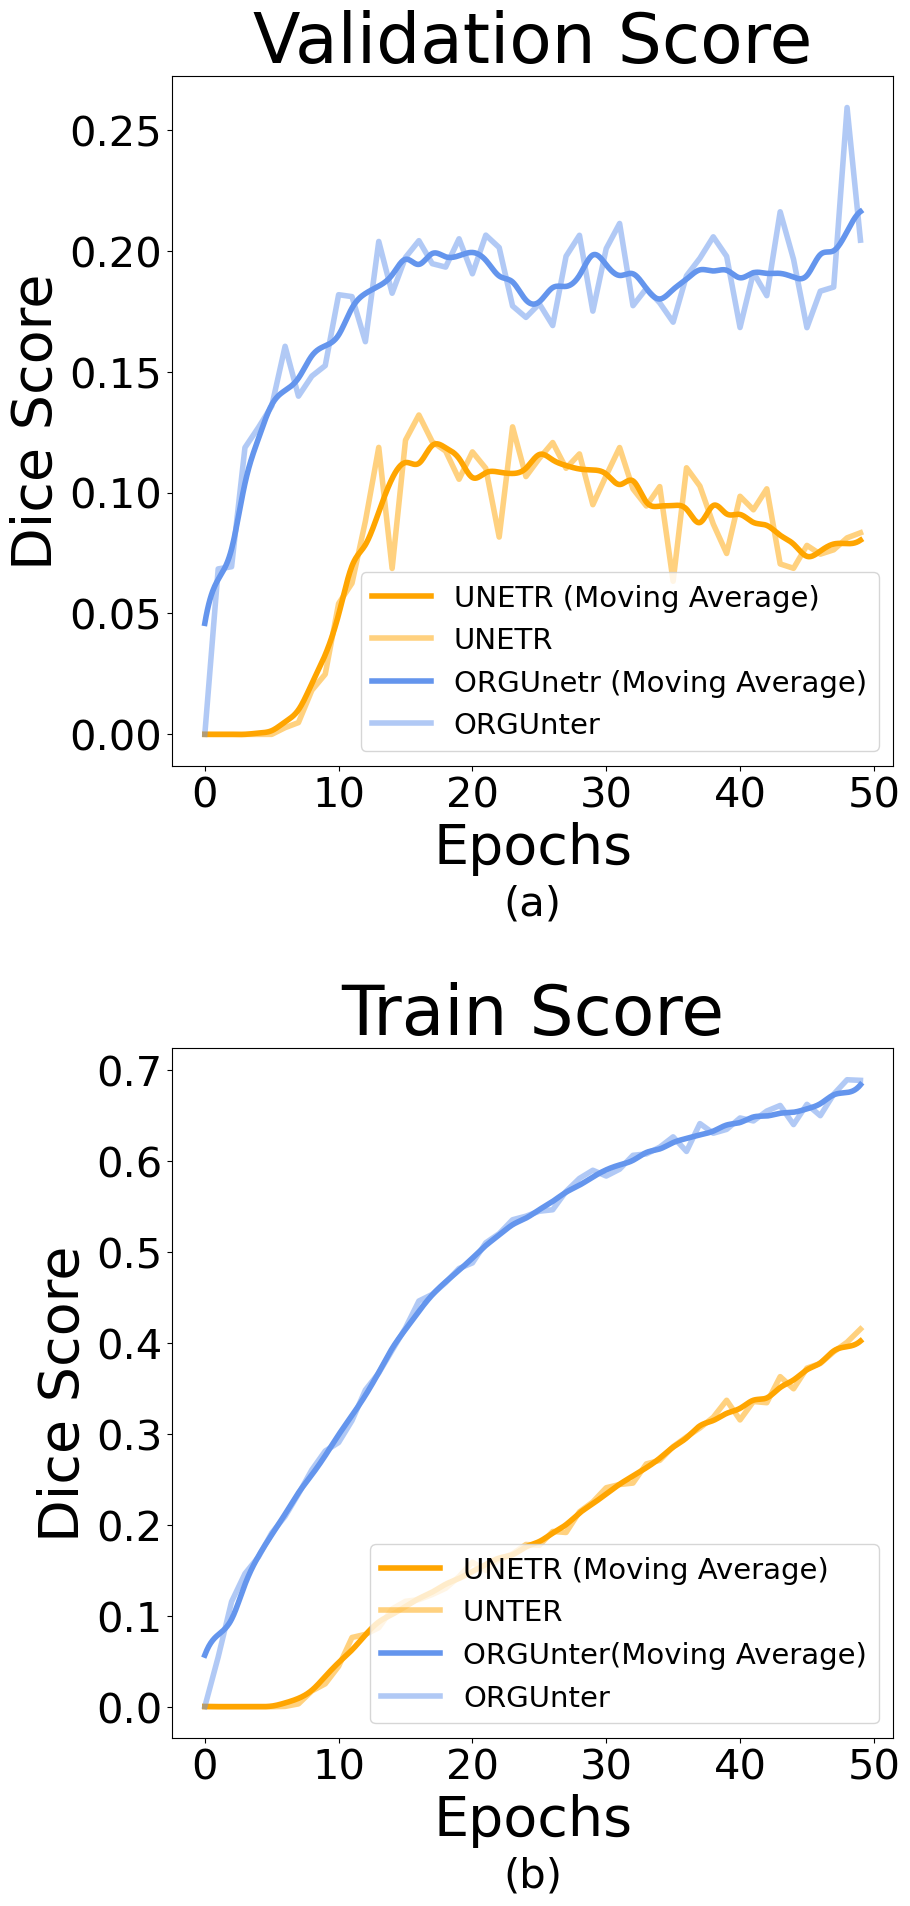

In [11]:
# import numpy as np
# import matplotlib.pyplot as plt
# import pandas as pd
# from scipy.interpolate import splrep, splev

# # Assuming you have numpy arrays dice_train, dice_tumor_only_val, and dice_val

# x_tick = np.arange(0, len(dice_train))
# window_size = 5 # You can adjust this value to change the smoothness of the curve

# # Calculate the moving averages for dice_tumor_only_val and dice_val
# moving_avg_tumor_only_val = pd.Series(dice_tumor_only_val).rolling(window=window_size, min_periods=1, center=True).mean()
# moving_avg_val = pd.Series(dice_val).rolling(window=window_size, min_periods=1, center=True).mean()
# moving_avg_tumor_only_train = pd.Series(dice_tumor_only_train).rolling(window=window_size, min_periods=1, center=True).mean()
# moving_avg_train = pd.Series(dice_train).rolling(window=window_size, min_periods=1, center=True).mean()

# # Create a smooth curve using cubic spline interpolation for dice_tumor_only_val
# tck_tumor_only_val = splrep(x_tick, moving_avg_tumor_only_val, s=0)
# tck_tumor_only_train = splrep(x_tick, moving_avg_tumor_only_train, s=0)
# # Create a smooth curve using cubic spline interpolation for dice_val
# tck_val = splrep(x_tick, moving_avg_val, s=0)
# tck_train = splrep(x_tick, moving_avg_train, s=0)
# # Generate points on the curve for plotting
# x_smooth = np.linspace(x_tick.min(), x_tick.max(), 1000)
# smooth_curve_tumor_only_val = splev(x_smooth, tck_tumor_only_val)
# smooth_curve_val = splev(x_smooth, tck_val)
# smooth_curve_tumor_only_train = splev(x_smooth, tck_tumor_only_train)
# smooth_curve_train = splev(x_smooth, tck_train)

# plt.figure(figsize=(10, 20), dpi=100)  # Adjusted figure size for vertical layout

# # Set line thickness
# line_thickness = 4

# # Top subplot for validation scores
# plt.subplot(2, 1, 1)  # Adjusted subplot configuration
# plt.plot(x_smooth, smooth_curve_tumor_only_val, "orange", label="UNETR (Moving Average)", linewidth=line_thickness)
# plt.plot(x_tick, dice_tumor_only_val, "orange", alpha=0.5, label="UNETR", linewidth=line_thickness)
# plt.plot(x_smooth, smooth_curve_val, "cornflowerblue", label="ORGUnetr (Moving Average)", linewidth=line_thickness)
# plt.plot(x_tick, dice_val, "cornflowerblue", alpha=0.5, label="ORGUnter", linewidth=line_thickness)
# plt.text(0.5, -0.2, '(a)', size=30, ha='center', va='center', transform=plt.gca().transAxes)
# plt.title("Validation Score", fontsize=50)
# plt.xlabel("Epochs", fontsize=40)
# plt.ylabel("Dice Score", fontsize=40)
# plt.xticks(fontsize=30)
# plt.yticks(fontsize=30)
# plt.legend(loc="lower right", fontsize=21, frameon=True)

# # Bottom subplot for training scores
# plt.subplot(2, 1, 2)  # Adjusted subplot configuration
# plt.plot(x_smooth, smooth_curve_tumor_only_train, "orange", label="UNETR (Moving Average)", linewidth=line_thickness)
# plt.plot(x_tick, dice_tumor_only_train, "orange", alpha=0.5, label="UNTER ", linewidth=line_thickness)
# plt.plot(x_smooth, smooth_curve_train, "cornflowerblue", label="ORGUnter(Moving Average)", linewidth=line_thickness)
# plt.plot(x_tick, dice_train, "cornflowerblue", alpha=0.5, label="ORGUnter", linewidth=line_thickness)
# plt.text(0.5, -0.2, '(b)', size=30, ha='center', va='center', transform=plt.gca().transAxes)
# plt.title("Train Score", fontsize=50)
# plt.xlabel("Epochs", fontsize=40)
# plt.ylabel("Dice Score", fontsize=40)
# plt.xticks(fontsize=30)
# plt.yticks(fontsize=30)
# plt.legend(loc="lower right", fontsize=21, frameon=True)

# plt.tight_layout(pad=4.0)  # Added padding for better spacing between subplots
# plt.savefig('Kidney_Dice_2row')
# plt.show()


# Loss 비교

## 순서대로, Proposed 모델의 loss test파일, loss_train 파일, Baseline model의 loss test파일, loss_train파일의 경로를 넣어주시면 됩니당

In [12]:
loss_val = []

###############################################################
###############    Loss Score Test Tumor&Organ    #############
###############################################################
filename = 'OrgUNETR_loss_val.txt'
f = open(filename, 'r')

for line in f.readlines():
    loss_val.append(float(line))
    
a = 0
b = []
for i in range(len(loss_val)):
    a += loss_val[i]
    if ((i+1) % num_points) == 0:
        b.append(a/num_points)
        a = 0
loss_val = b

loss_train = []
###############################################################
###############    Loss Score Train Tumor&Organ   #############
###############################################################

filename = 'OrgUNETR_loss_train.txt'
f = open(filename, 'r')

for line in f.readlines():
    loss_train.append(float(line))
    
a = 0
b = []
for i in range(len(loss_train)):
    a += loss_train[i]
    if ((i+1) % num_points) == 0:
        b.append(a/num_points)
        a = 0
loss_train = b

loss_tumor_only_val = []
###############################################################
###############    Loss Score Test Tumor Only    #############
###############################################################

filename = 'baseline_loss_val.txt'
f = open(filename, 'r')

for line in f.readlines():
    loss_tumor_only_val.append(float(line))
    
a = 0
b = []
for i in range(len(loss_tumor_only_val)):
    a += loss_tumor_only_val[i]
    if ((i+1) % num_points) == 0:
        b.append(a/num_points)
        a = 0
loss_tumor_only_val = b

loss_tumor_only_train = []
###############################################################
###############    Loss Score Train Tumor Only    #############
###############################################################

filename = 'baseline_loss_train.txt'
f = open(filename, 'r')

for line in f.readlines():
    loss_tumor_only_train.append(float(line))
    
a = 0
b = []
for i in range(len(loss_tumor_only_train)):
    a += loss_tumor_only_train[i]
    if ((i+1) % num_points) == 0:
        b.append(a/num_points)
        a = 0
loss_tumor_only_train = b


In [13]:
len(loss_tumor_only_train)

50

In [14]:
len(loss_train)

50

In [15]:
len(loss_val)

50

In [16]:
len(loss_tumor_only_val)

50

In [17]:
(min(loss_tumor_only_val)-min(loss_val))/min(loss_tumor_only_val)

0.3785646485442072

In [18]:
print("Length of loss_train:", len(loss_train))
print("Length of loss_val:", len(loss_val))
print("Length of loss_tumor_only_val:", len(loss_tumor_only_val))
print("Length of loss_tumor_only_train:", len(loss_tumor_only_train))

Length of loss_train: 50
Length of loss_val: 50
Length of loss_tumor_only_val: 50
Length of loss_tumor_only_train: 50


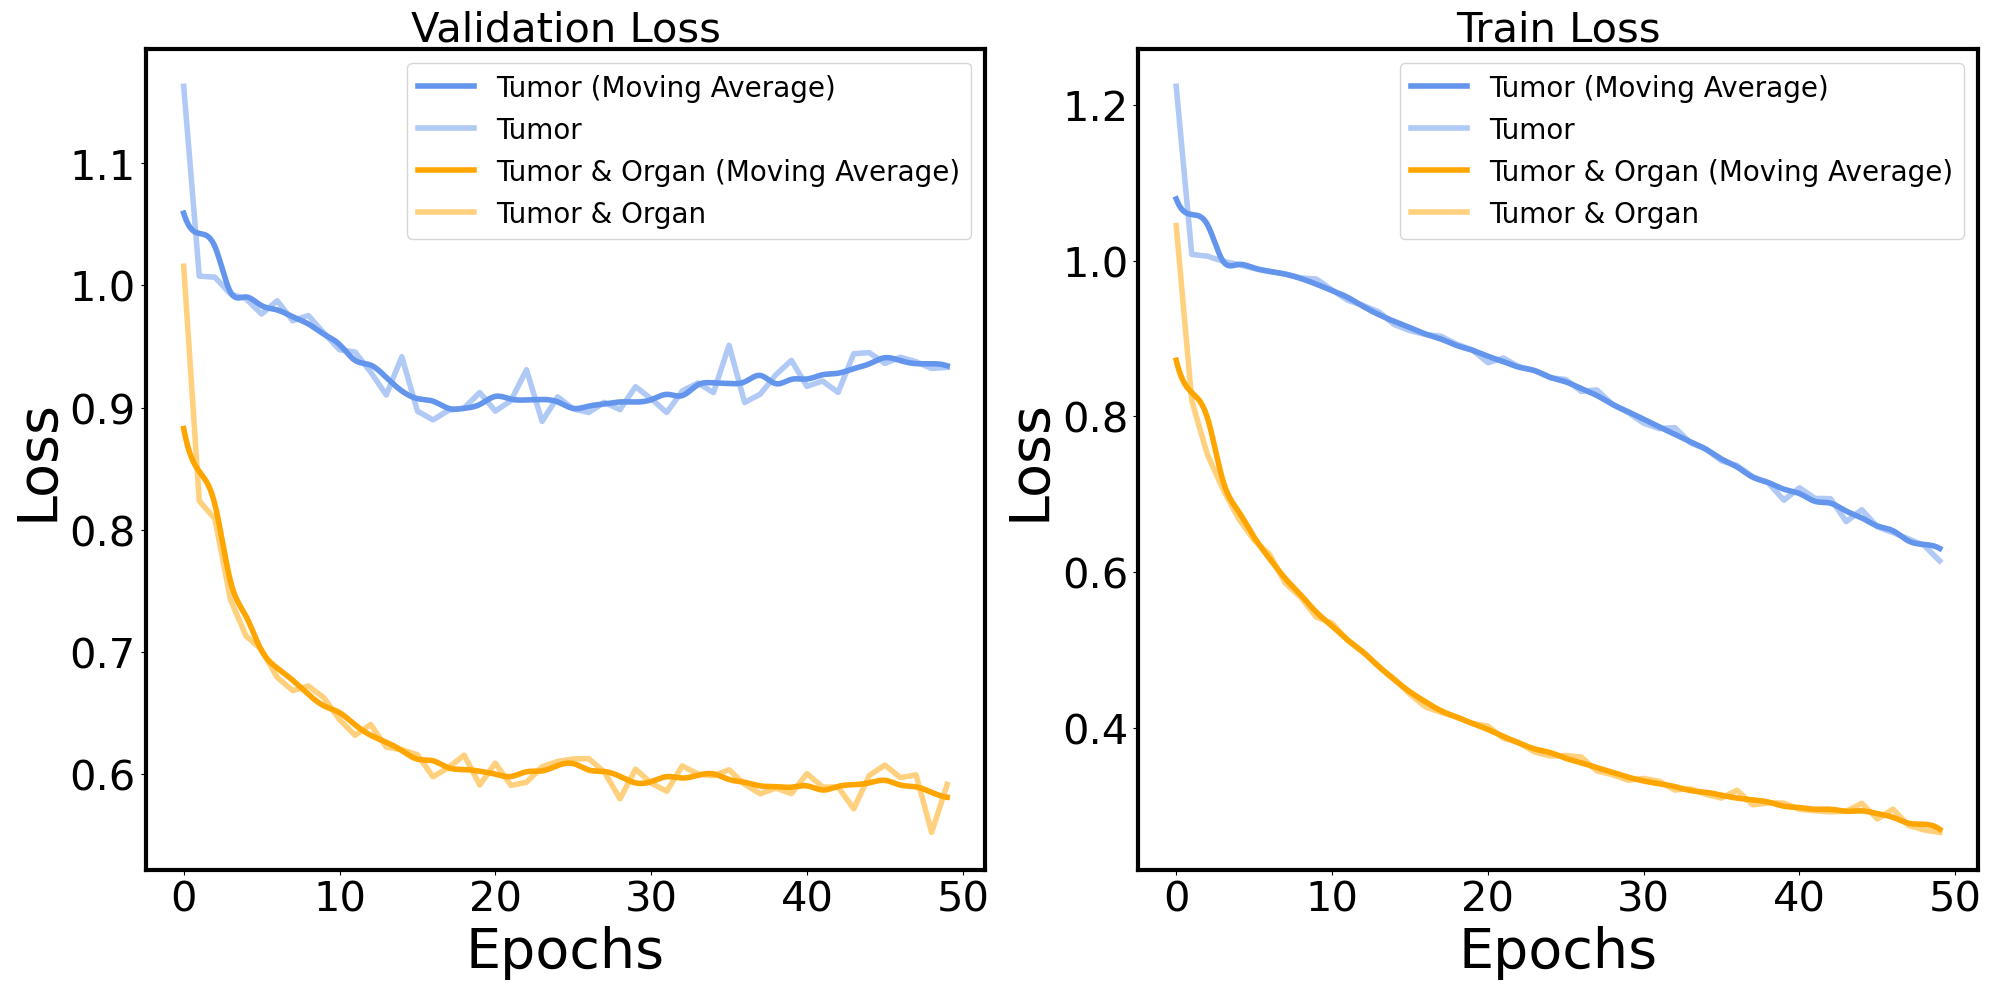

In [19]:
linewidth = 3
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.interpolate import splrep, splev

# Assuming you have numpy arrays loss_train, loss_tumor_only_val, and loss_val

x_tick = np.arange(0, len(loss_train))
window_size = 5 # You can adjust this value to change the smoothness of the curve

# Calculate the moving averages for loss_tumor_only_val and loss_val
moving_avg_tumor_only_val = pd.Series(loss_tumor_only_val).rolling(window=window_size, min_periods=1, center=True).mean()
moving_avg_val = pd.Series(loss_val).rolling(window=window_size, min_periods=1, center=True).mean()
moving_avg_tumor_only_train = pd.Series(loss_tumor_only_train).rolling(window=window_size, min_periods=1, center=True).mean()
moving_avg_train = pd.Series(loss_train).rolling(window=window_size, min_periods=1, center=True).mean()

# Create a smooth curve using cubic spline interpolation for loss_tumor_only_val
tck_tumor_only_val = splrep(x_tick, moving_avg_tumor_only_val, s=0)
tck_tumor_only_train = splrep(x_tick, moving_avg_tumor_only_train, s=0)
# Create a smooth curve using cubic spline interpolation for loss_val
tck_val = splrep(x_tick, moving_avg_val, s=0)
tck_train = splrep(x_tick, moving_avg_train, s=0)
# Generate points on the curve for plotting
x_smooth = np.linspace(x_tick.min(), x_tick.max(), 1000)
smooth_curve_tumor_only_val = splev(x_smooth, tck_tumor_only_val)
smooth_curve_val = splev(x_smooth, tck_val)
smooth_curve_tumor_only_train = splev(x_smooth, tck_tumor_only_train)
smooth_curve_train = splev(x_smooth, tck_train)
# Plot the curved lines with moving averages
plt.figure(figsize=(20, 10), dpi=100)

# Set line thickness
line_thickness = 4

# Left subplot for loss_tumor_only_val
plt.subplot(1, 2, 1)
plt.plot(x_smooth, smooth_curve_tumor_only_val, "cornflowerblue", label="Tumor (Moving Average)", linewidth=line_thickness)
plt.plot(x_tick, loss_tumor_only_val, "cornflowerblue", alpha=0.5, label="Tumor", linewidth=line_thickness)
plt.plot(x_smooth, smooth_curve_val, "orange", label="Tumor & Organ (Moving Average)", linewidth=line_thickness)
plt.plot(x_tick, loss_val, "orange", alpha=0.5, label="Tumor & Organ", linewidth=line_thickness)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.xlabel("Epochs", fontsize=40)
plt.ylabel("Loss", fontsize=40)
plt.title("Validation Loss", fontsize=30)
plt.legend(loc="upper right", fontsize=20, frameon=True, ncol=1)
plt.tight_layout()
ax = plt.gca()  
ax.spines['top'].set_linewidth(linewidth)    
ax.spines['right'].set_linewidth(linewidth)  
ax.spines['bottom'].set_linewidth(linewidth) 
ax.spines['left'].set_linewidth(linewidth) 
# Right subplot for loss_tumor_only_train
plt.subplot(1, 2, 2)
plt.plot(x_smooth, smooth_curve_tumor_only_train, "cornflowerblue", label="Tumor (Moving Average)", linewidth=line_thickness)
plt.plot(x_tick, loss_tumor_only_train, "cornflowerblue", alpha=0.5, label="Tumor ", linewidth=line_thickness)
plt.plot(x_smooth, smooth_curve_train, "orange", label="Tumor & Organ (Moving Average)", linewidth=line_thickness)
plt.plot(x_tick, loss_train, "orange", alpha=0.5, label="Tumor & Organ", linewidth=line_thickness)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.xlabel("Epochs", fontsize=40)
plt.ylabel("Loss", fontsize=40)
plt.title("Train Loss", fontsize=30)

# Adjust subplot spacing and show the legend
plt.legend(loc="upper right", fontsize=20, frameon=True, ncol=1)
plt.tight_layout()
ax = plt.gca()  
ax.spines['top'].set_linewidth(linewidth)    
ax.spines['right'].set_linewidth(linewidth)  
ax.spines['bottom'].set_linewidth(linewidth) 
ax.spines['left'].set_linewidth(linewidth) 


# Save the figure
plt.savefig('Kidney_Loss_2col')

# Show the plots
plt.show()


In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.interpolate import splrep, splev

# Assuming you have numpy arrays dice_train, dice_tumor_only_val, and dice_val

x_tick = np.arange(0, len(loss_train))
window_size = 5 # You can adjust this value to change the smoothness of the curve

# Calculate the moving averages for loss_tumor_only_val and loss_val
moving_avg_tumor_only_val = pd.Series(loss_tumor_only_val).rolling(window=window_size, min_periods=1, center=True).mean()
moving_avg_val = pd.Series(loss_val).rolling(window=window_size, min_periods=1, center=True).mean()
moving_avg_tumor_only_train = pd.Series(loss_tumor_only_train).rolling(window=window_size, min_periods=1, center=True).mean()
moving_avg_train = pd.Series(loss_train).rolling(window=window_size, min_periods=1, center=True).mean()
# Create a smooth curve using cubic spline interpolation for loss_tumor_only_val
tck_tumor_only_val = splrep(x_tick, moving_avg_tumor_only_val, s=0)
tck_tumor_only_train = splrep(x_tick, moving_avg_tumor_only_train, s=0)
# Create a smooth curve using cubic spline interpolation for loss_val
tck_val = splrep(x_tick, moving_avg_val, s=0)
tck_train = splrep(x_tick, moving_avg_train, s=0)
# Generate points on the curve for plotting
x_smooth = np.linspace(x_tick.min(), x_tick.max(), 1000)
smooth_curve_tumor_only_val = splev(x_smooth, tck_tumor_only_val)
smooth_curve_val = splev(x_smooth, tck_val)
smooth_curve_tumor_only_train = splev(x_smooth, tck_tumor_only_train)
smooth_curve_train = splev(x_smooth, tck_train)
# Plot the curved lines with moving averages
plt.figure(figsize=(20, 10), dpi=1000)

# Set line thickness
line_thickness = 4

# Left subplot for validation losss
plt.subplot(1, 2, 1)
plt.plot(x_smooth, smooth_curve_tumor_only_val, "cornflowerblue", label="UNETR (Moving Average)", linewidth=line_thickness)
plt.plot(x_tick, loss_tumor_only_val, "cornflowerblue", alpha=0.5, label="UNETR", linewidth=line_thickness)
plt.plot(x_smooth, smooth_curve_val, "orange", label="OrgUNETR (Moving Average)", linewidth=line_thickness)
plt.plot(x_tick, loss_val, "orange", alpha=0.5, label="OrgUNETR", linewidth=line_thickness)
plt.text(0.5, -0.25, '(a)', size=50, ha='center', va='center', transform=plt.gca().transAxes, fontname='Times New Roman')
plt.title("Validation loss", fontsize=50)
plt.xlabel("Epochs", fontsize=40)
plt.ylabel("Loss", fontsize=40)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.legend(loc="upper right", fontsize=22, frameon=True, ncol=1)

# Right subplot for training scores
plt.subplot(1, 2, 2)
plt.plot(x_smooth, smooth_curve_tumor_only_train, "cornflowerblue", label="UNETR (Moving Average)", linewidth=line_thickness)
plt.plot(x_tick, loss_tumor_only_train, "cornflowerblue", alpha=0.5, label="UNETR ", linewidth=line_thickness)
plt.plot(x_smooth, smooth_curve_train, "orange", label="OrgUNETR (Moving Average)", linewidth=line_thickness)
plt.plot(x_tick, loss_train, "orange", alpha=0.5, label="OrgUNETR", linewidth=line_thickness)
plt.xticks(fontsize=30)
plt.text(0.5, -0.25, '(b)', size=50, ha='center', va='center', transform=plt.gca().transAxes, fontname='Times New Roman')
plt.title("Train loss", fontsize=50)
plt.xlabel("Epochs", fontsize=40)
plt.ylabel("Loss", fontsize=40)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.legend(loc="upper right", fontsize=22, frameon=True, ncol=1)

plt.tight_layout()
plt.savefig('Kidney_loss_2cols')
plt.show()


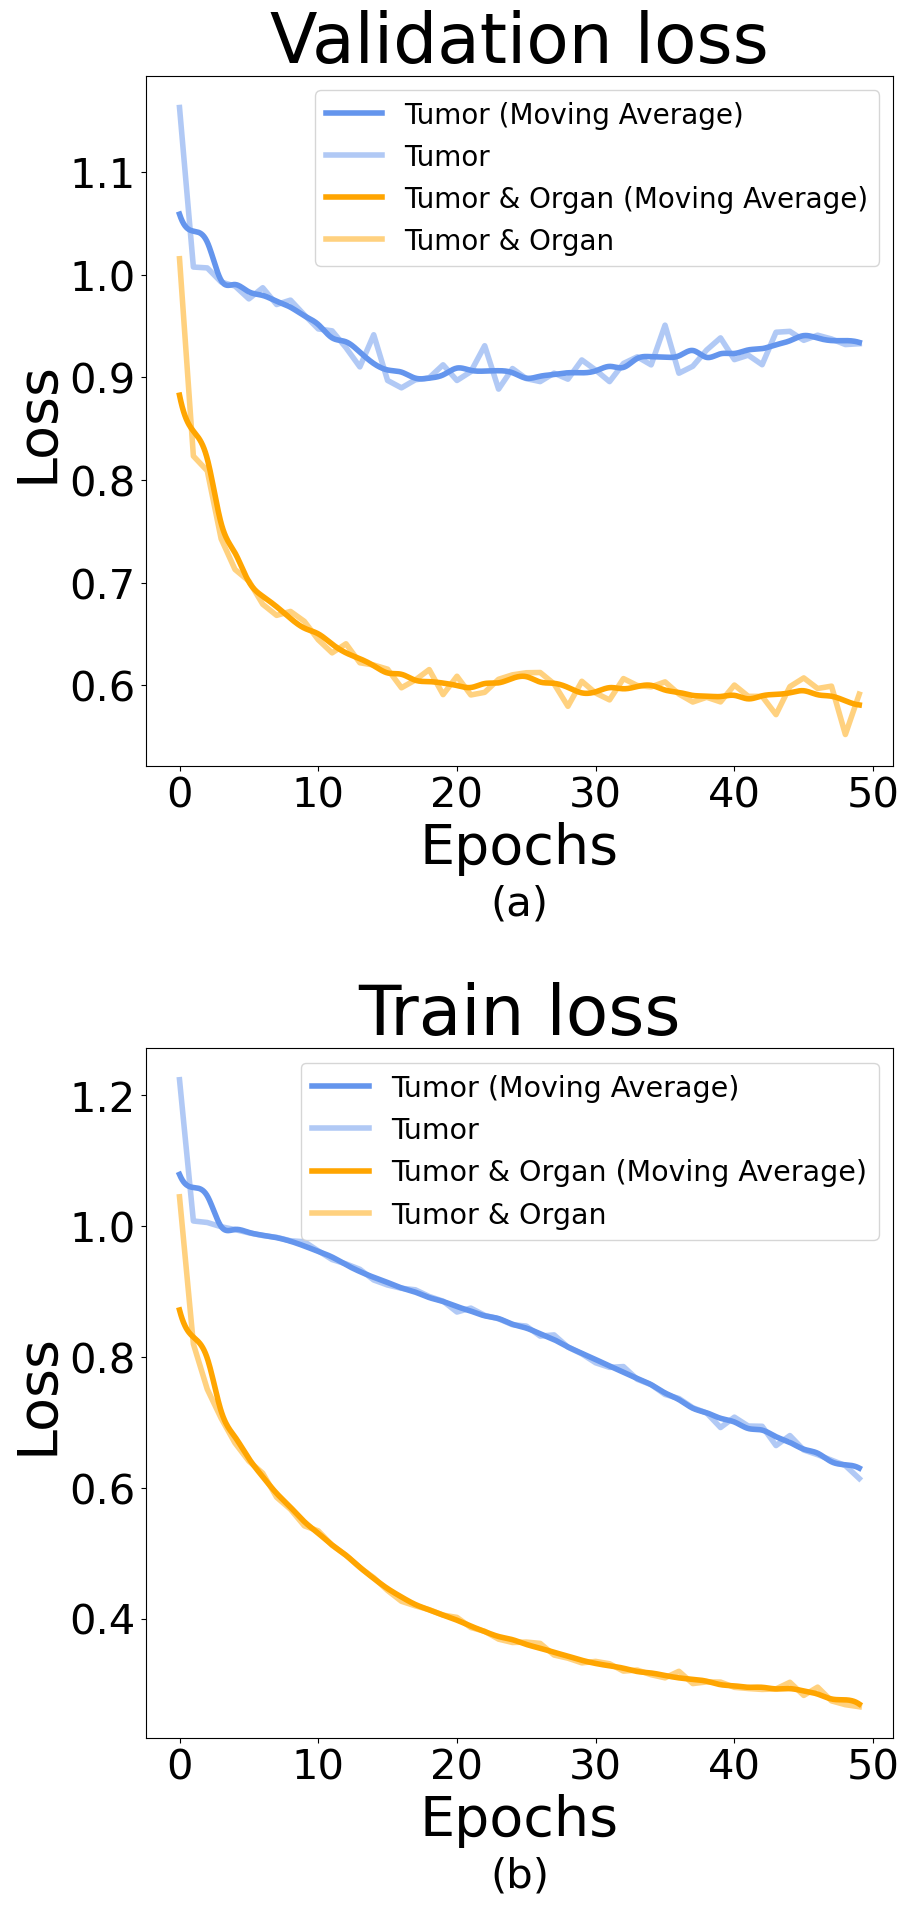

In [21]:
# import numpy as np
# import matplotlib.pyplot as plt
# import pandas as pd
# from scipy.interpolate import splrep, splev

# # Assuming you have numpy arrays dice_train, dice_tumor_only_val, and dice_val

# x_tick = np.arange(0, len(loss_train))
# window_size = 5 # You can adjust this value to change the smoothness of the curve

# # Calculate the moving averages for loss_tumor_only_val and loss_val
# moving_avg_tumor_only_val = pd.Series(loss_tumor_only_val).rolling(window=window_size, min_periods=1, center=True).mean()
# moving_avg_val = pd.Series(loss_val).rolling(window=window_size, min_periods=1, center=True).mean()
# moving_avg_tumor_only_train = pd.Series(loss_tumor_only_train).rolling(window=window_size, min_periods=1, center=True).mean()
# moving_avg_train = pd.Series(loss_train).rolling(window=window_size, min_periods=1, center=True).mean()

# # Create a smooth curve using cubic spline interpolation for loss_tumor_only_val
# tck_tumor_only_val = splrep(x_tick, moving_avg_tumor_only_val, s=0)
# tck_tumor_only_train = splrep(x_tick, moving_avg_tumor_only_train, s=0)
# # Create a smooth curve using cubic spline interpolation for loss_val
# tck_val = splrep(x_tick, moving_avg_val, s=0)
# tck_train = splrep(x_tick, moving_avg_train, s=0)
# # Generate points on the curve for plotting
# x_smooth = np.linspace(x_tick.min(), x_tick.max(), 1000)
# smooth_curve_tumor_only_val = splev(x_smooth, tck_tumor_only_val)
# smooth_curve_val = splev(x_smooth, tck_val)
# smooth_curve_tumor_only_train = splev(x_smooth, tck_tumor_only_train)
# smooth_curve_train = splev(x_smooth, tck_train)

# plt.figure(figsize=(10, 20), dpi=100)  # Adjusted figure size for vertical layout

# # Set line thickness
# line_thickness = 4

# # Top subplot for validation losss
# plt.subplot(2, 1, 1)  # Adjusted subplot configuration
# plt.plot(x_smooth, smooth_curve_tumor_only_val, "cornflowerblue", label="Tumor (Moving Average)", linewidth=line_thickness)
# plt.plot(x_tick, loss_tumor_only_val, "cornflowerblue", alpha=0.5, label="Tumor", linewidth=line_thickness)
# plt.plot(x_smooth, smooth_curve_val, "orange", label="Tumor & Organ (Moving Average)", linewidth=line_thickness)
# plt.plot(x_tick, loss_val, "orange", alpha=0.5, label="Tumor & Organ", linewidth=line_thickness)
# plt.text(0.5, -0.2, '(a)', size=30, ha='center', va='center', transform=plt.gca().transAxes)
# plt.title("Validation loss", fontsize=50)
# plt.xlabel("Epochs", fontsize=40)
# plt.ylabel("Loss", fontsize=40)
# plt.xticks(fontsize=30)
# plt.yticks(fontsize=30)
# plt.legend(loc="upper right", fontsize=20, frameon=True)

# # Bottom subplot for training scores
# plt.subplot(2, 1, 2)  # Adjusted subplot configuration
# plt.plot(x_smooth, smooth_curve_tumor_only_train, "cornflowerblue", label="Tumor (Moving Average)", linewidth=line_thickness)
# plt.plot(x_tick, loss_tumor_only_train, "cornflowerblue", alpha=0.5, label="Tumor ", linewidth=line_thickness)
# plt.plot(x_smooth, smooth_curve_train, "orange", label="Tumor & Organ (Moving Average)", linewidth=line_thickness)
# plt.plot(x_tick, loss_train, "orange", alpha=0.5, label="Tumor & Organ", linewidth=line_thickness)
# plt.text(0.5, -0.2, '(b)', size=30, ha='center', va='center', transform=plt.gca().transAxes)
# plt.title("Train loss", fontsize=50)
# plt.xlabel("Epochs", fontsize=40)
# plt.ylabel("Loss", fontsize=40)
# plt.xticks(fontsize=30)
# plt.yticks(fontsize=30)
# plt.legend(loc="upper right", fontsize=20.5, frameon=True)

# plt.tight_layout(pad=4.0)  # Added padding for better spacing between subplots
# plt.savefig('Kidney_loss_2row')
# plt.show()
